<p align="left"><img src="https://i.imgur.com/cZCLrza.jpg"></p>

# 1) Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import scipy.stats as ss
import math

In [2]:
# set option to display all the columns
pd.set_option('display.max_columns', None)

In [3]:
# read data file and display the top 5 rows
auto_prices = pd.read_csv(r'C:\Users\User\Desktop\Tech\BCG RISE\IU 4.6 - Machine Learning\Jupyter Notebook\CSV Files\Automobile_price_data__Raw_.csv')
auto_prices.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### Remarks:
- column names have dash (-)
- column of **'normalized_losses'** has question mark (?)

In [4]:
# display the # of rows and columns of the dataset
auto_prices.shape

(205, 26)

# 2) Data Preparation

In [5]:
# replace dash (-) with underscore (_) for column names
auto_prices.columns = auto_prices.columns.str.replace('-','_')
auto_prices.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [6]:
# data types
auto_prices.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

#### Remarks:
- column **'normalized_losses'**, **'bore'**, **'stroke'**, **'horsepower'**, **'peak_rpm'** and **'price'** have data type as _**'object'**_

In [7]:
# check rows with question mark (?)
auto_prices[auto_prices.isin(['?'])].count()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [8]:
# percentage per column that contains question mark (?)
((auto_prices[auto_prices.isin(['?'])].count()) / (auto_prices.count())) * 100

symboling             0.00000
normalized_losses    20.00000
make                  0.00000
fuel_type             0.00000
aspiration            0.00000
num_of_doors          0.97561
body_style            0.00000
drive_wheels          0.00000
engine_location       0.00000
wheel_base            0.00000
length                0.00000
width                 0.00000
height                0.00000
curb_weight           0.00000
engine_type           0.00000
num_of_cylinders      0.00000
engine_size           0.00000
fuel_system           0.00000
bore                  1.95122
stroke                1.95122
compression_ratio     0.00000
horsepower            0.97561
peak_rpm              0.97561
city_mpg              0.00000
highway_mpg           0.00000
price                 1.95122
dtype: float64

In [9]:
# convert rows with question marks (?) percentage < 5%
cols_drop = ['num_of_doors', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price']
for col in cols_drop:
    auto_prices[col].replace('?', np.nan, inplace=True)

In [10]:
# drop these nan values that make up < 5% of the column
auto_prices.dropna(axis=0, inplace=True)

In [11]:
# double check if there are any nan values
auto_prices.isna().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [12]:
# number of rows left after dropping nan values
auto_prices.shape

(193, 26)

In [13]:
# locate all rows with question mark (?) under column = normalized_losses
auto_prices[auto_prices.normalized_losses=='?']

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
14,1,?,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3055,ohc,six,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,?,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,?,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880
43,0,?,isuzu,gas,std,four,sedan,rwd,front,94.3,170.7,61.8,53.5,2337,ohc,four,111,2bbl,3.31,3.23,8.5,78,4800,24,29,6785


In [14]:
# filter out rows under normalized_lossess == '?'
auto_prices_wo_qn_mark = auto_prices[auto_prices.normalized_losses!='?']
auto_prices_wo_qn_mark.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [15]:
# display the # of rows and columns
auto_prices_wo_qn_mark.shape

(159, 26)

In [16]:
auto_prices_wo_qn_mark.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [17]:
# convert data types for the following columns
dtype_cols = ['normalized_losses', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price']

for c in dtype_cols:
    auto_prices_wo_qn_mark[c] = pd.to_numeric(auto_prices_wo_qn_mark[c])

<ipython-input-17-e00ffc6da2f1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_prices_wo_qn_mark[c] = pd.to_numeric(auto_prices_wo_qn_mark[c])


In [18]:
auto_prices_wo_qn_mark.dtypes

symboling              int64
normalized_losses      int64
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower             int64
peak_rpm               int64
city_mpg               int64
highway_mpg            int64
price                  int64
dtype: object

In [19]:
# summary statistics for numeric variables 
auto_prices_wo_qn_mark.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.735849,121.132075,98.264151,172.413836,65.607547,53.899371,2461.138365,119.226415,3.300126,3.236352,10.161132,95.836478,5113.836478,26.522013,32.081761,11445.729560
std,1.193086,35.651285,5.167416,11.523177,1.947883,2.268761,481.941321,30.460791,0.267336,0.294888,3.889475,30.718583,465.754864,6.097142,6.459189,5877.856195
min,-2.000000,65.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,15.000000,18.000000,5118.000000
25%,0.000000,94.000000,94.500000,165.650000,64.000000,52.250000,2065.500000,97.000000,3.050000,3.105000,8.700000,69.000000,4800.000000,23.000000,28.000000,7372.000000
50%,1.000000,113.000000,96.900000,172.400000,65.400000,54.100000,2340.000000,110.000000,3.270000,3.270000,9.000000,88.000000,5200.000000,26.000000,32.000000,9233.000000
75%,2.000000,148.000000,100.800000,177.800000,66.500000,55.500000,2809.500000,135.000000,3.560000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,14719.500000
max,3.000000,256.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,3.940000,4.170000,23.000000,200.000000,6600.000000,49.000000,54.000000,35056.000000


In [20]:
# group the dataframe by 'make' and get the mean for all numeric variables
auto_prices_wo_qn_mark.groupby('make').mean()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
make,,,,,,,,,,,,,,,,
audi,1.500000,161.000000,102.700000,184.650000,68.850000,55.050000,2772.750000,128.000000,3.175000,3.400000,8.700000,116.750000,5500.000000,19.500000,24.250000,18246.250000
bmw,0.500000,190.000000,101.200000,176.800000,64.800000,54.300000,2566.250000,136.000000,3.405000,2.995000,8.900000,111.000000,5025.000000,22.000000,28.500000,18857.500000
chevrolet,1.000000,100.000000,92.466667,151.933333,62.500000,52.400000,1757.000000,80.333333,2.990000,3.083333,9.566667,62.666667,5300.000000,41.000000,46.333333,6007.000000
dodge,1.000000,131.625000,95.175000,161.450000,64.212500,51.775000,2146.375000,103.250000,3.102500,3.362500,8.763750,84.375000,5375.000000,28.500000,34.625000,7790.125000
honda,0.615385,103.000000,94.330769,160.769231,64.384615,53.238462,2096.769231,99.307692,3.021538,3.462308,9.215385,80.230769,5753.846154,30.384615,35.461538,8184.692308
jaguar,0.000000,145.000000,113.000000,199.600000,69.600000,52.800000,4066.000000,258.000000,3.630000,4.170000,8.100000,176.000000,4750.000000,15.000000,19.000000,32250.000000
mazda,0.636364,114.454545,96.763636,170.445455,65.418182,54.436364,2206.818182,109.545455,3.264545,3.260000,8.727273,80.000000,4909.090909,27.545455,33.636364,9080.000000
mercedes-benz,0.000000,102.800000,107.780000,190.440000,70.620000,55.440000,3643.000000,193.200000,3.556000,3.532000,18.860000,129.400000,4430.000000,20.800000,23.600000,29726.400000
mitsubishi,1.500000,146.200000,95.190000,166.480000,64.940000,50.840000,2228.500000,107.000000,3.150000,3.384000,8.380000,91.800000,5350.000000,26.700000,33.300000,7813.000000


In [21]:
# dataframe with values containing question mark (?)
auto_prices_w_qn_mark = auto_prices[auto_prices.normalized_losses=='?']
auto_prices_w_qn_mark

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
14,1,?,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3055,ohc,six,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,?,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,?,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880
43,0,?,isuzu,gas,std,four,sedan,rwd,front,94.3,170.7,61.8,53.5,2337,ohc,four,111,2bbl,3.31,3.23,8.5,78,4800,24,29,6785


In [22]:
# create dictionary of make and normalized_losses based on mean of existing values
nl_dict = {'alfa-romero':121, 'audi':161, 'bmw':190, 'isuzu':121, 'jaguar':145, 'mazda':114, 'mercedes-benz':103, 'mercury':121, 'mitsubishi':146, 'peugot':161, 'plymouth':129, 'porsche':186, 'toyota':110, 'volkswagen':121}
auto_prices_w_qn_mark['normalized_losses'] = auto_prices_w_qn_mark['make'].map(nl_dict)

<ipython-input-22-7de74148752a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_prices_w_qn_mark['normalized_losses'] = auto_prices_w_qn_mark['make'].map(nl_dict)


In [23]:
# replaced question mark (?) with the mean of the makes
auto_prices_w_qn_mark

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,121,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,121,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,121,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,161,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
7,1,161,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
14,1,190,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3055,ohc,six,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,190,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,190,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,190,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880
43,0,121,isuzu,gas,std,four,sedan,rwd,front,94.3,170.7,61.8,53.5,2337,ohc,four,111,2bbl,3.31,3.23,8.5,78,4800,24,29,6785


In [24]:
auto_prices_w_qn_mark.dtypes

symboling              int64
normalized_losses      int64
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [25]:
# create new dataframe with normalized_losses treated
auto_prices_1 = pd.concat([auto_prices_wo_qn_mark, auto_prices_w_qn_mark], ignore_index=True)
auto_prices_1

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
1,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
2,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
3,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
4,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,-1,110,toyota,gas,std,four,wagon,rwd,front,104.5,187.8,66.5,54.1,3151,dohc,six,161,mpfi,3.27,3.35,9.2,156,5200,19,24,15750
189,3,121,volkswagen,gas,std,two,convertible,fwd,front,94.5,159.3,64.2,55.6,2254,ohc,four,109,mpfi,3.19,3.40,8.5,90,5500,24,29,11595
190,0,121,volkswagen,gas,std,four,sedan,fwd,front,100.4,180.2,66.9,55.1,2661,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,24,13295
191,0,121,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,180.2,66.9,55.1,2579,ohc,four,97,idi,3.01,3.40,23.0,68,4500,33,38,13845


In [26]:
auto_prices_1.dtypes

symboling              int64
normalized_losses      int64
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [27]:
# convert data types for the following columns
dtype_cols = ['bore', 'stroke', 'horsepower', 'peak_rpm', 'price']

for c in dtype_cols:
    auto_prices_1[c] = pd.to_numeric(auto_prices_1[c])

In [28]:
auto_prices_1.dtypes

symboling              int64
normalized_losses      int64
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower             int64
peak_rpm               int64
city_mpg               int64
highway_mpg            int64
price                  int64
dtype: object

## a. Target / Label aka 'price'

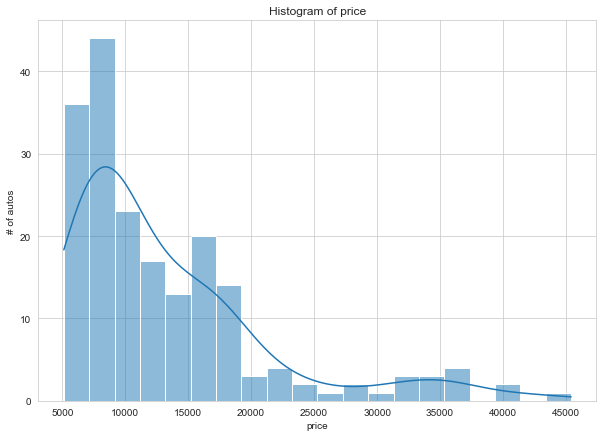

In [29]:
# plot histogram
plt.figure(figsize=(10,7))
sns.set_style('whitegrid')
sns.histplot(auto_prices_1['price'], bins=20, kde=True)
plt.xlabel('price')
plt.ylabel('# of autos')
plt.title('Histogram of price')
plt.show()

#### Remarks:
- the distribution of the label: **['price']** is skewed right

In [30]:
# scaling the distribution of 'price'
auto_prices_1['log_price'] = np.log(auto_prices_1['price'])

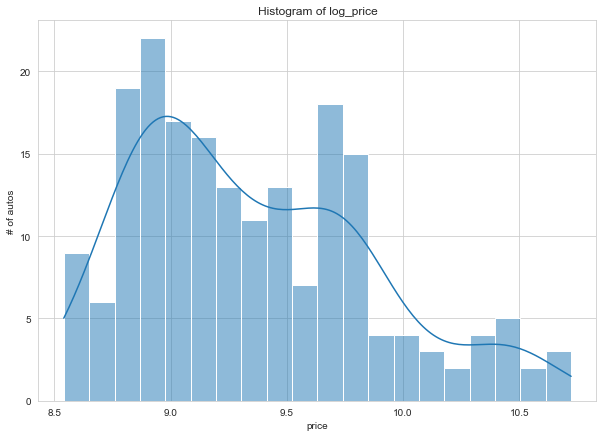

In [31]:
plt.figure(figsize=(10,7))
sns.set_style('whitegrid')
sns.histplot(auto_prices_1['log_price'], bins=20, kde=True)
plt.xlabel('price')
plt.ylabel('# of autos')
plt.title('Histogram of log_price')
plt.show()

## b. Categorical Variables

In [32]:
# create a list of categorical variables
cat_cols = []
for col in auto_prices_1.columns:
    if auto_prices_1[col].dtypes == 'object':
        cat_cols.append(col)
print(f'There are {len(cat_cols)} categorical variables')
print(f'\nCategorical variables: {cat_cols}')

There are 10 categorical variables

Categorical variables: ['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders', 'fuel_system']


In [33]:
# return the # of labels for each categorical variable
for col in cat_cols:
    print(f'{col} has {len(auto_prices_1[col].unique())} distinct values')

make has 21 distinct values
fuel_type has 2 distinct values
aspiration has 2 distinct values
num_of_doors has 2 distinct values
body_style has 5 distinct values
drive_wheels has 3 distinct values
engine_location has 2 distinct values
engine_type has 5 distinct values
num_of_cylinders has 6 distinct values
fuel_system has 7 distinct values


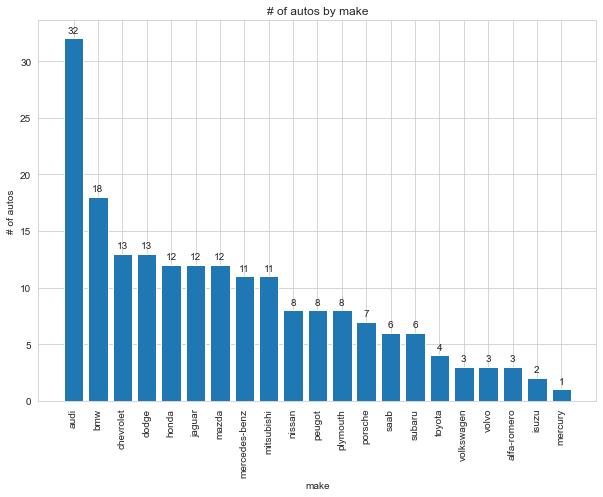

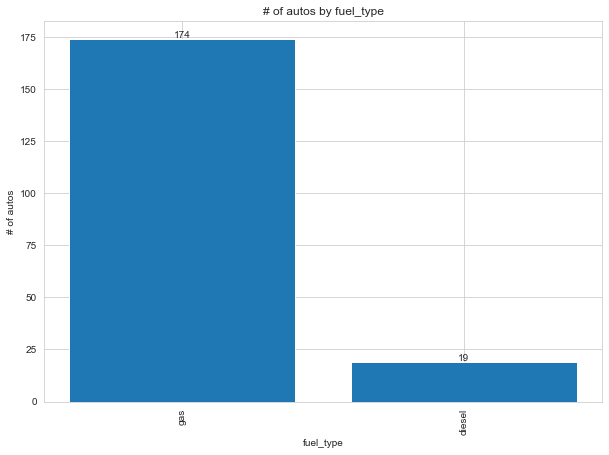

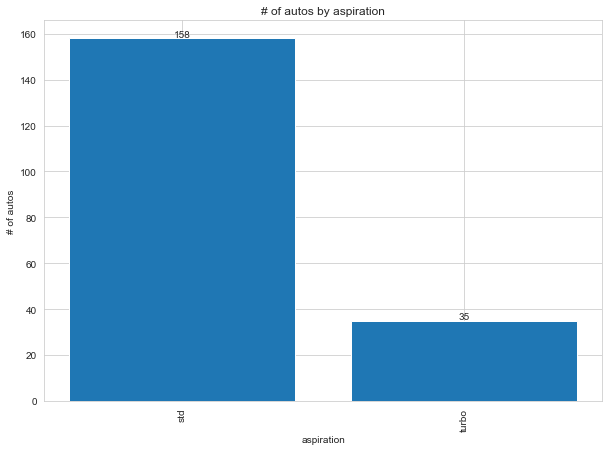

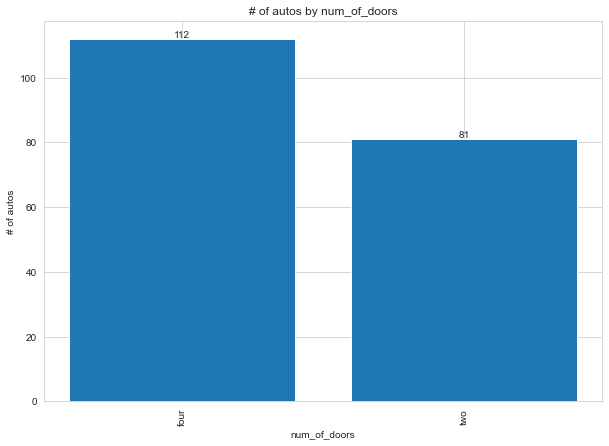

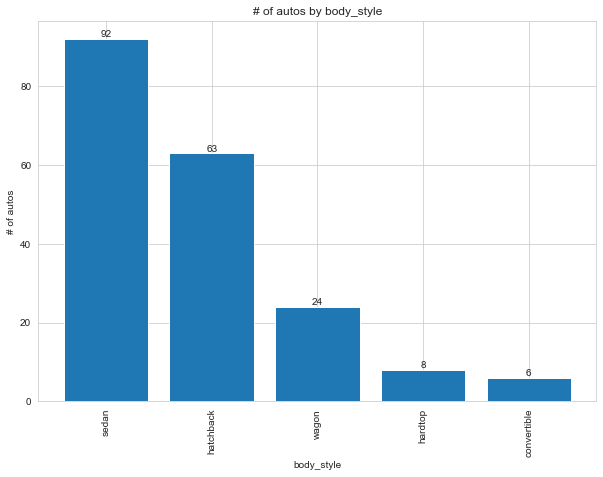

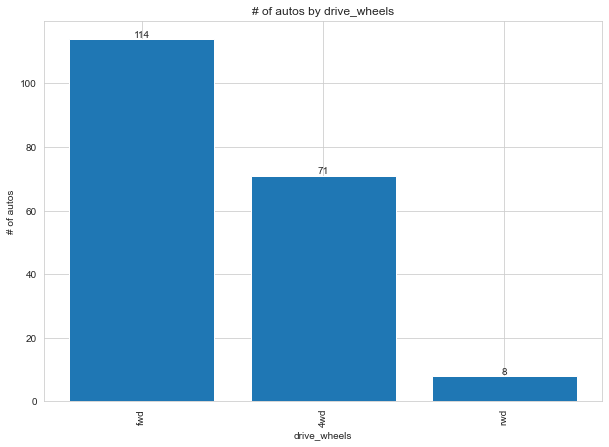

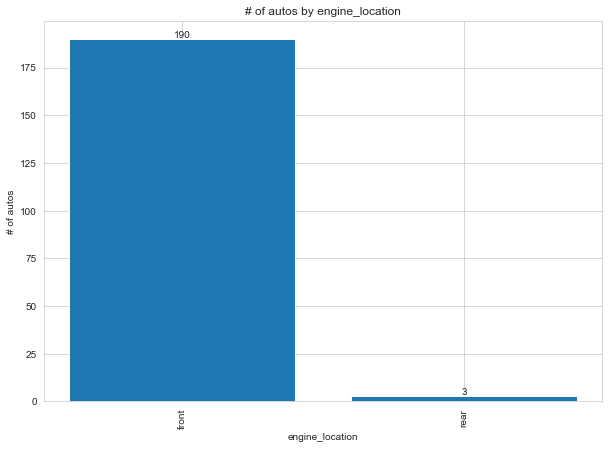

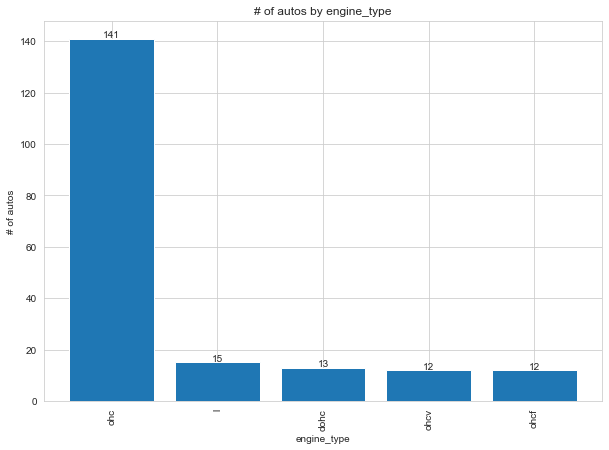

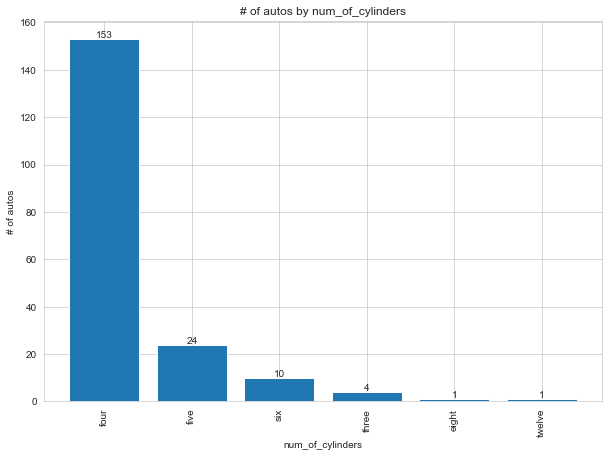

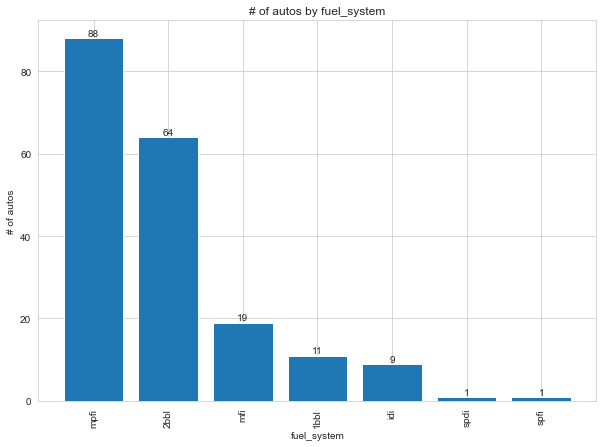

In [34]:
# plot bar chart for the categorical variables
for c in cat_cols:
    x = auto_prices_1[c].unique()
    y = auto_prices_1[c].value_counts()
    plt.figure(figsize=(10,7))
    plt.bar(x, y)
    plt.xlabel(c)
    plt.ylabel('# of autos')
    plt.title('# of autos by ' + c)
    plt.xticks(rotation='vertical')
    for i in range(len(x)):
        plt.text(i, y[i]+0.5, y[i], ha='center')
    plt.show()

#### Remarks:
- Based on the bar charts, <br>
_i_. **['make']** has the highest number of distinct values (21) and a few of these distinct values have 1 or 2 data values only <br>
_ii_. **['engine_location']** - _**'front'**_ has 190 data values compared to _**'rear'**_ with 3 data values only <br>
_iii_. **['engine_type']** - _**'ohc'**_ has significantly more data values than the other 4 combined <br>
_iv_. **['num_of_cylinders']** & **['fuel_system']** have higher number of distinct values and a couple of these distinct values have only 1 data value <br>
Hence, **['make']**, **['engine_location']** will not be further examined

### i) Aggregate Categorical Variables

In [35]:
# aggregate body_style
body_style_dict = {'sedan':'sedan', 'hatchback':'hatchback', 'wagon':'wagon', 'hardtop':'hardtop_convertible', 'convertible':'hardtop_convertible'}
auto_prices_1['body_style'] = auto_prices_1['body_style'].map(body_style_dict)
auto_prices_1['body_style'].value_counts()

sedan                  92
hatchback              63
wagon                  24
hardtop_convertible    14
Name: body_style, dtype: int64

In [36]:
# aggregate num_of_cylinders
cylinder_dict = {'three':'three_four', 'four':'three_four', 'five':'five_six', 'six':'five_six', 'eight':'eight_twelve', 'twelve':'eight_twelve'}
auto_prices_1['num_of_cylinders'] = auto_prices_1['num_of_cylinders'].map(cylinder_dict)
auto_prices_1['num_of_cylinders'].value_counts()

three_four      154
five_six         34
eight_twelve      5
Name: num_of_cylinders, dtype: int64

In [37]:
# aggregate fuel_system
fuel_system_dict = {'mpfi':'mpfi_mfi_spfi', '2bbl':'2bbl_1bbl', 'idi':'idi_spdi', '1bbl':'2bbl_1bbl', 'spdi':'idi_spdi', 'mfi':'mpfi_mfi_spfi', 'spfi':'mpfi_mfi_spfi'}
auto_prices_1['fuel_system'] = auto_prices_1['fuel_system'].map(fuel_system_dict)
auto_prices_1['fuel_system'].value_counts()

mpfi_mfi_spfi    90
2bbl_1bbl        75
idi_spdi         28
Name: fuel_system, dtype: int64

In [38]:
# list of categorical variables to be examined further
cat_cols = ['fuel_type','aspiration','num_of_doors','body_style','drive_wheels','engine_type','num_of_cylinders','fuel_system']

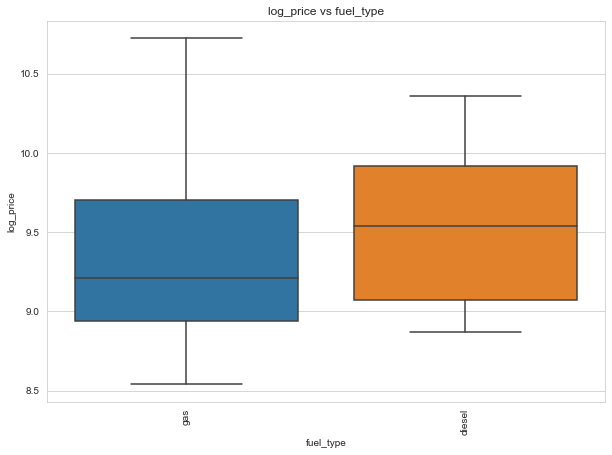

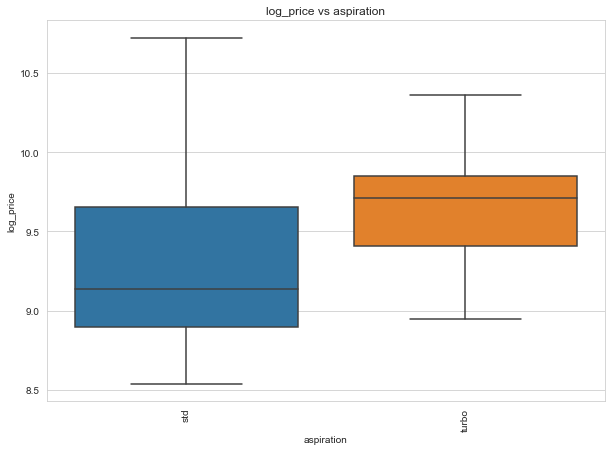

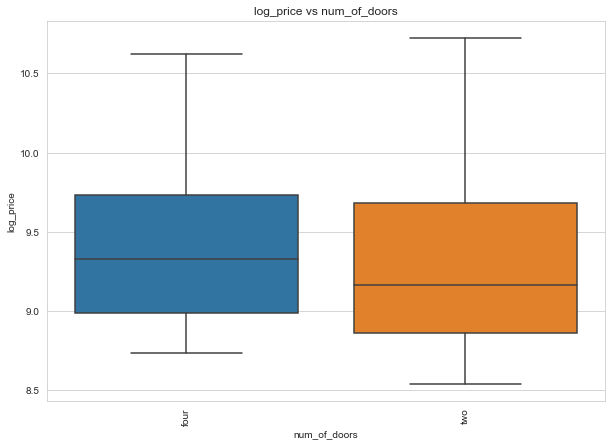

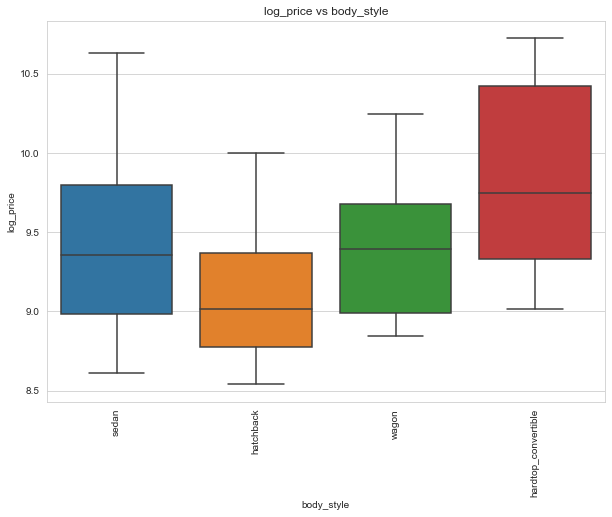

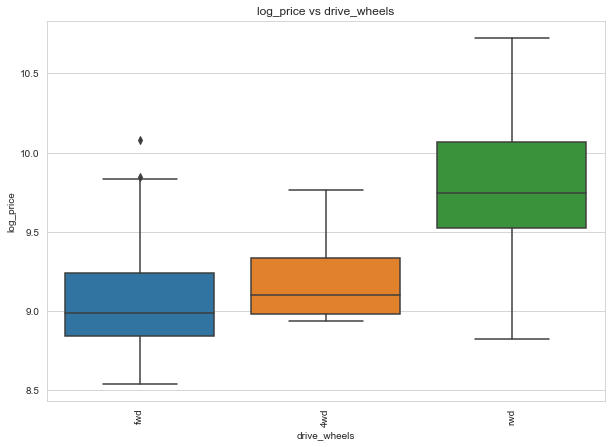

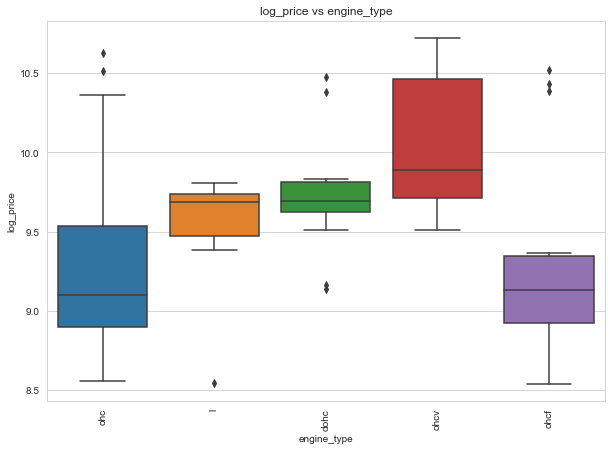

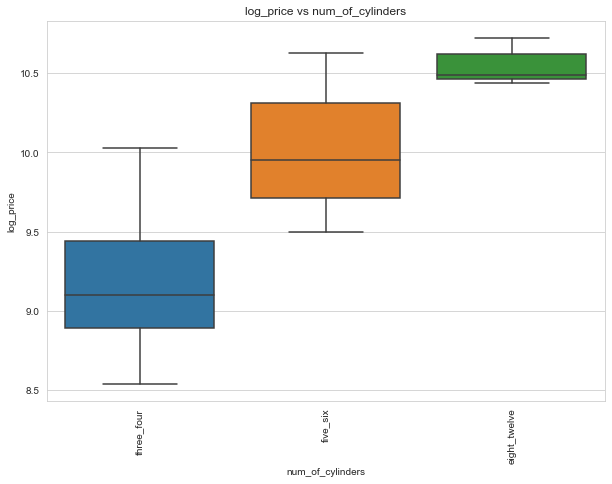

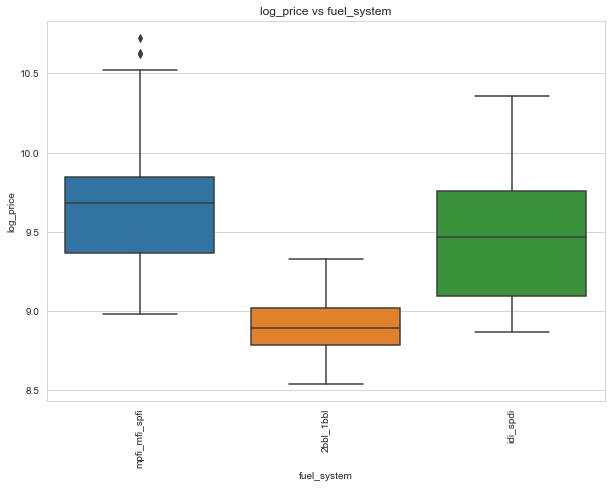

In [39]:
# boxplot of label ('log_price') against cat_cols_1
for c in cat_cols:
    plt.figure(figsize=(10,7))
    sns.boxplot(x=c, y='log_price', data=auto_prices_1)
    plt.xlabel(c)
    plt.ylabel('log_price')
    plt.title('log_price vs ' + c)
    plt.xticks(rotation='vertical')
    plt.show()

#### Remarks:

- **['fuel_type']**: _**'diesel'**_ autos are pricier than _**'gas'**_
- **['aspiration']**: _**'turbo'**_ autos are pricier than _**'std'**_
- **['num_of_doors']**: _**'four'** and _**'two'**_ have no significant difference in their auto prices
- **['body_style']**: there are distinct differences in auto prices of different categories
- **['drive_wheels']**: there are distinct differences in auto prices of different categories
- **['engine_type']**: there are distinct differences in auto prices of different categories
- **['num_of_cylinders']**: there are distinct differences in auto prices of different categories
- **['fuel_system']**: there are distinct differences in auto prices of different categories

In [40]:
# finalised categorical variables
cat_cols = ['fuel_type','aspiration','body_style','drive_wheels','engine_type','num_of_cylinders','fuel_system']
cat_cols

['fuel_type',
 'aspiration',
 'body_style',
 'drive_wheels',
 'engine_type',
 'num_of_cylinders',
 'fuel_system']

## c. Numerical Variables

In [41]:
num_cols = []
for col in auto_prices_1.columns:
    if auto_prices_1[col].dtypes != 'object':
        num_cols.append(col)
print(f'There are {len(num_cols)} numerical variables')
print(f'\nNumerical variables: {num_cols}')

There are 17 numerical variables

Numerical variables: ['symboling', 'normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price', 'log_price']


In [42]:
# correlation matrix for numerical variables
auto_prices_1.corr()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,log_price
symboling,1.000000,0.462195,-0.536516,-0.363194,-0.247741,-0.517803,-0.231086,-0.068327,-0.144785,-0.010884,-0.175160,0.069491,0.227899,0.017639,0.085775,-0.084835,-0.101555
normalized_losses,0.462195,1.000000,-0.000196,0.118931,0.150101,-0.317402,0.207254,0.249476,0.071481,0.049846,-0.113264,0.353981,0.232818,-0.310608,-0.261616,0.299599,0.322978
wheel_base,-0.536516,-0.000196,1.000000,0.879307,0.818465,0.591239,0.782173,0.568375,0.495957,0.174225,0.252234,0.377040,-0.350823,-0.504499,-0.571771,0.584951,0.640086
length,-0.363194,0.118931,0.879307,1.000000,0.857368,0.491050,0.882694,0.686998,0.606373,0.121888,0.156061,0.589650,-0.276144,-0.702143,-0.731264,0.695928,0.784258
width,-0.247741,0.150101,0.818465,0.857368,1.000000,0.310640,0.867640,0.739903,0.541633,0.188733,0.188631,0.621532,-0.247612,-0.657153,-0.702009,0.754649,0.801764
height,-0.517803,-0.317402,0.591239,0.491050,0.310640,1.000000,0.305837,0.026906,0.182445,-0.054338,0.253934,-0.081730,-0.257334,-0.111166,-0.159850,0.136234,0.190950
curb_weight,-0.231086,0.207254,0.782173,0.882694,0.867640,0.305837,1.000000,0.857188,0.645070,0.175349,0.161030,0.762154,-0.278528,-0.777763,-0.818104,0.835368,0.894539
engine_size,-0.068327,0.249476,0.568375,0.686998,0.739903,0.026906,0.857188,1.000000,0.581854,0.214518,0.025257,0.845325,-0.217769,-0.716378,-0.737531,0.888778,0.852459
bore,-0.144785,0.071481,0.495957,0.606373,0.541633,0.182445,0.645070,0.581854,1.000000,-0.065038,-0.004172,0.572972,-0.273766,-0.601369,-0.608804,0.546295,0.609027
stroke,-0.010884,0.049846,0.174225,0.121888,0.188733,-0.054338,0.175349,0.214518,-0.065038,1.000000,0.199600,0.102913,-0.068420,-0.031248,-0.040274,0.096007,0.111484


<AxesSubplot:>

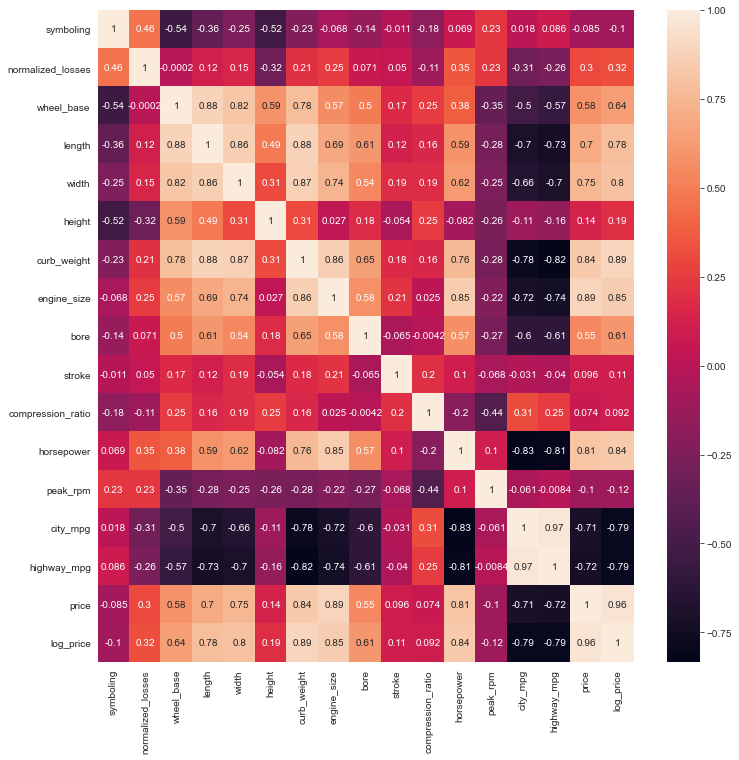

In [43]:
# correlation heatmap
plt.figure(figsize=(12,12))
sns.heatmap(auto_prices_1.corr(), annot=True)

#### Remarks:
- Based on the correlation heatmap above, the following numeric variables may be used as the features for the model and will require further examination:
1. **['curb_weight']**
2. **['engine_size']**
3. **['horsepower']**
4. **['city_mpg']**
5. **['highway_mpg']**

In [44]:
num_cols = ['curb_weight','engine_size','horsepower','city_mpg','highway_mpg']
num_cols

['curb_weight', 'engine_size', 'horsepower', 'city_mpg', 'highway_mpg']

In [45]:
round(auto_prices_1[num_cols].describe(),2)

,curb_weight,engine_size,horsepower,city_mpg,highway_mpg
count,193.00,193.00,193.00,193.00,193.00
mean,2561.51,128.12,103.48,25.33,30.79
std,526.70,41.59,37.96,6.39,6.82
min,1488.00,61.00,48.00,13.00,16.00
25%,2145.00,98.00,70.00,19.00,25.00
50%,2414.00,120.00,95.00,25.00,30.00
75%,2952.00,146.00,116.00,30.00,34.00
max,4066.00,326.00,262.00,49.00,54.00


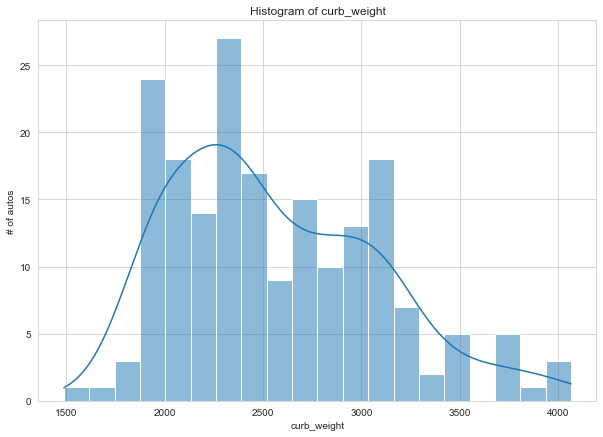

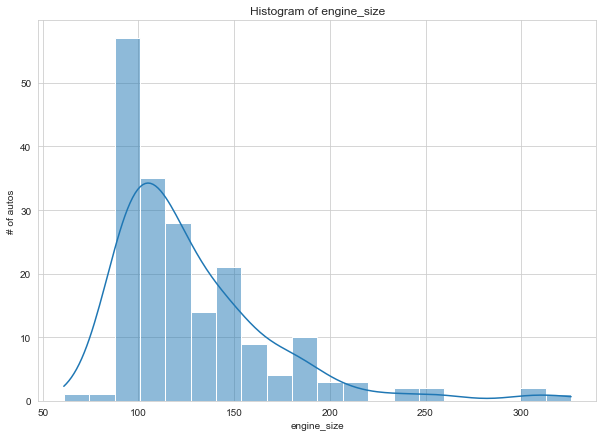

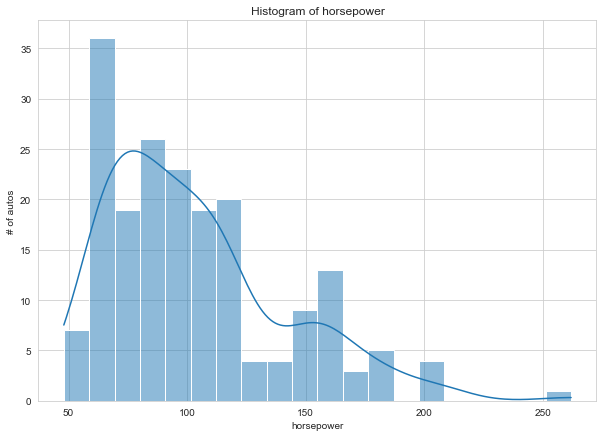

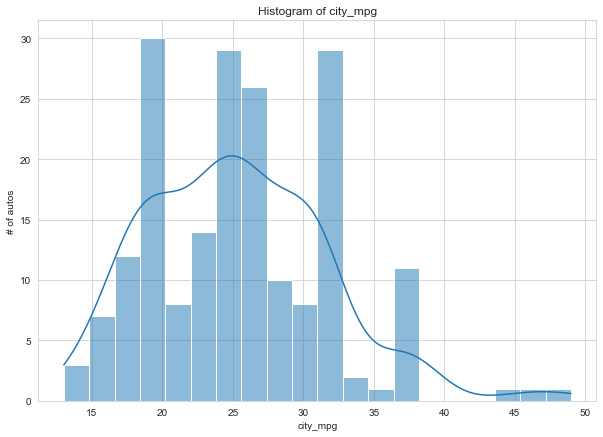

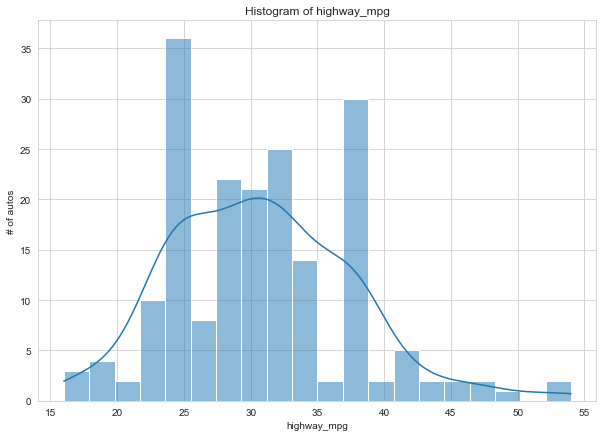

In [46]:
for c in num_cols:
    plt.figure(figsize=(10,7))
    sns.set_style('whitegrid')
    sns.histplot(auto_prices_1[c], bins=20, kde=True)
    plt.xlabel(c)
    plt.ylabel('# of autos')
    plt.title('Histogram of ' + c)
    plt.show()

#### Remarks:
- Based on above data visualisation for the numerical categories, <br>
_i_. **['engine_size']** and **['horsepower']** are skewed right

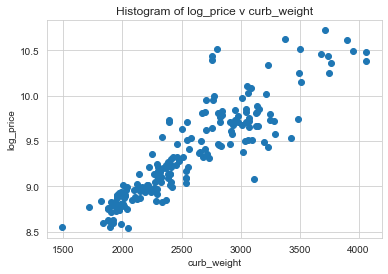

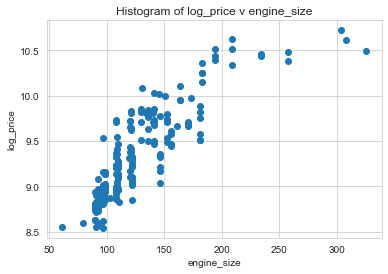

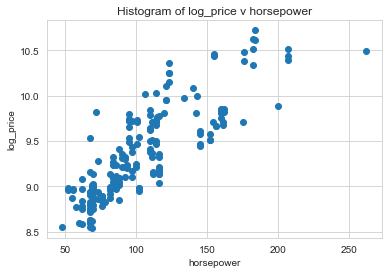

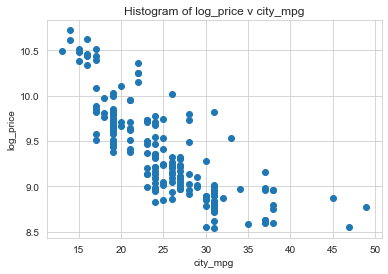

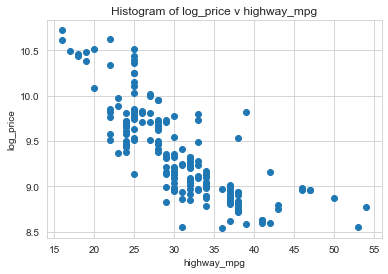

In [47]:
for c in num_cols:
    plt.scatter(x=c, y='log_price', data=auto_prices_1)
    plt.xlabel(c)
    plt.ylabel('log_price')
    plt.title('Histogram of log_price v ' + c)
    plt.show()

#### Remarks:
- **['engine_size']** and **['horsepower']** seems to be collinear
- **['city_mpg']** and **['highway_mpg']** seems to be collinear

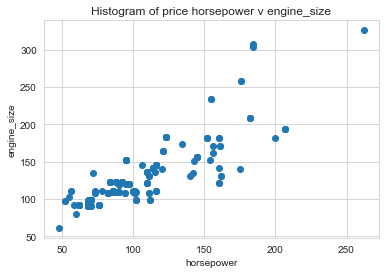

In [48]:
# investigate whether the numerical variables are collinear
plt.scatter(x='horsepower', y='engine_size', data=auto_prices_1)
plt.xlabel('horsepower')
plt.ylabel('engine_size')
plt.title('Histogram of price horsepower v engine_size')
plt.show()

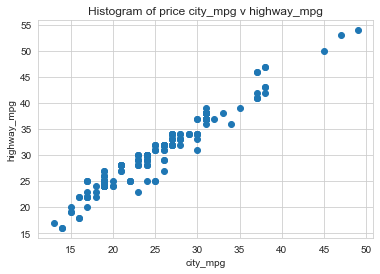

In [49]:
plt.scatter(x='city_mpg', y='highway_mpg', data=auto_prices_1)
plt.xlabel('city_mpg')
plt.ylabel('highway_mpg')
plt.title('Histogram of price city_mpg v highway_mpg')
plt.show()

#### Remarks:
- it is true that the numerical variables are collinear. Hence, we will select: <br>
1. **['engine_size']**
2. **['highway_mpg']**

In [50]:
num_cols = ['curb_weight', 'engine_size', 'highway_mpg']
num_cols

['curb_weight', 'engine_size', 'highway_mpg']

# 3) Modeling

In [51]:
# create dummy variables
print(auto_prices_1['fuel_type'].unique())
Features = auto_prices_1['fuel_type']
enc = preprocessing.LabelEncoder()
enc.fit(Features)
Features = enc.transform(Features)
print(Features)

['gas' 'diesel']
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 0 1]


In [52]:
ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(Features.reshape(-1,1))
Features = encoded.transform(Features.reshape(-1,1)).toarray()
Features[:10,:]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [53]:
def encode_string(cat_feature):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()
    

cat_cols = ['aspiration', 'body_style', 'drive_wheels', 'engine_type', 'num_of_cylinders', 'fuel_system']

for col in cat_cols:
    temp = encode_string(auto_prices_1[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :])

(193, 22)
[[0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]]


In [54]:
# add numeric variables
Features = np.concatenate([Features, np.array(auto_prices_1[['curb_weight', 'engine_size', 'highway_mpg']])], axis = 1)
Features[:2,:]

array([[0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.337e+03, 1.090e+02,
        3.000e+01],
       [0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.824e+03, 1.360e+02,
        2.200e+01]])

#### Remarks:
- There are now 25 features; 22 dummy and 3 numeric

## a. Train Test Split

In [55]:
# train_test_split dataset
import numpy.random as nr
nr.seed(1231)
labels = np.array(auto_prices_1['log_price'])
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 63)
X_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [56]:
# scale numeric variables
scaler = preprocessing.StandardScaler().fit(X_train[:,22:])
X_train[:,22:] = scaler.transform(X_train[:,22:])
X_test[:,22:] = scaler.transform(X_test[:,22:])
print(X_train.shape)
X_train[:5,:]

(130, 25)


array([[ 0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  2.21856594,  2.38993112, -1.79576962],
       [ 0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        , -1.10337985, -0.92656336,  1.03736206],
       [ 0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1

In [57]:
# define and fit the linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [58]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[1.92927774 1.9190973  1.85333773 1.99503731 1.02643276 0.94318314
 0.98007524 0.8986839  1.16470497 1.30476958 1.37890049 0.61346866
 0.7632654  0.892873   0.99912972 0.57963825 1.48645901 1.34304009
 1.01887594 1.23951883 1.18910192 1.41975429 0.29760772 0.06947653
 0.01164628]


## b. Evaluation

In [59]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(X_test) 
print_metrics(y_test, y_score, 28)

Mean Square Error      = 0.033569793443127736
Root Mean Square Error = 0.18322061413260174
Mean Absolute Error    = 0.14102940838438013
Median Absolute Error  = 0.10950882890471547
R^2                    = 0.8382910829815796
Adjusted R^2           = 0.7135442041387982


In [60]:
y_test1 = y_test.round(decimals=0)
y_test1

array([10.,  9.,  9.,  9.,  9.,  9., 10.,  9., 10.,  9., 10.,  9., 10.,
        9.,  9., 10.,  9.,  9.,  9.,  9.,  9., 10.,  9.,  9.,  9., 10.,
        9., 10., 10.,  9., 10.,  9.,  9., 10.,  9., 10.,  9.,  9., 10.,
        9.,  9., 10., 10.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
       10.,  9.,  9.,  9.,  9., 10., 10., 10.,  9.,  9., 10.])

In [61]:
y_score1 = y_score.round(decimals=4)
y_score1

array([10.0908,  9.03  ,  9.1069,  9.025 ,  9.0098,  9.0785,  9.6815,
        9.0559, 10.137 ,  8.8945,  9.4754,  9.0679,  9.2107,  9.1335,
        9.4119,  9.3353,  9.243 ,  8.7697,  8.9542,  8.9566,  8.9656,
       10.3517,  9.0215,  9.3133,  9.2327,  9.6605,  8.9395,  9.764 ,
        9.3254,  9.4398,  9.3847,  9.2042,  8.7688,  9.4097,  8.3569,
        9.491 ,  8.7973,  8.769 ,  9.7948,  9.5946,  9.1162,  9.9682,
        9.2107,  9.5968,  8.816 ,  9.0682,  8.823 ,  8.8273,  8.7558,
        9.2924,  9.5311,  8.9396, 10.3166,  8.8279,  8.7272,  9.2197,
        9.0559, 10.5372,  9.7479,  9.7149,  9.046 ,  8.8363, 10.5372])

In [62]:
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test1, y_score1)
print(ROC_AUC)

0.9478458049886622


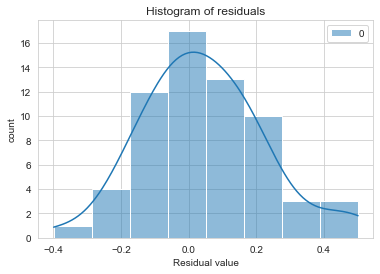

In [63]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.histplot(resids, kde=True)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score)    

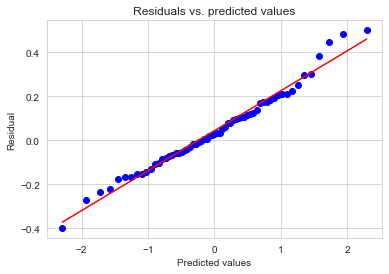

In [64]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score)

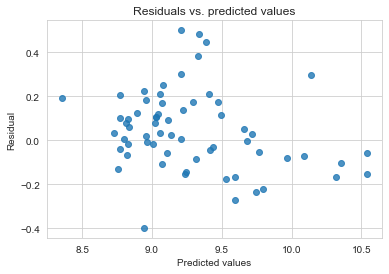

In [65]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(x=y_score, y=resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score)

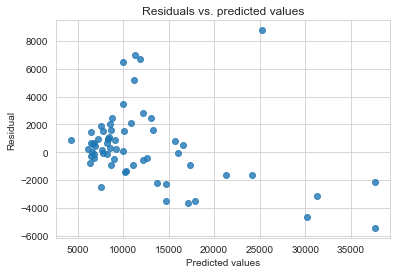

In [66]:
y_score_untransform = np.exp(y_score)
y_test_untransform = np.exp(y_test)
resid_plot(y_test_untransform, y_score_untransform) 